## Project: Identify Customer Segments (Unsupervised Learning)
### By Somya Bharti

> In this project, I will be applying unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that I will use was provided by Udacity's partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.



In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline


### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

> Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. I used this information to cluster the general population into groups with similar demographic properties. Then, I will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.



In [7]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep =';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

### Assess the Data:

In [8]:
azdias.tail(10)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
891211,-1,3,1,2.0,3,2,4,3,3,2,...,1.0,4.0,2.0,0.0,2.0,3.0,2.0,3.0,5.0,5.0
891212,-1,4,1,1.0,3,1,5,1,1,5,...,1.0,3.0,3.0,2.0,5.0,4.0,1.0,3.0,9.0,5.0
891213,-1,4,2,5.0,3,3,3,5,3,2,...,2.0,4.0,2.0,1.0,2.0,5.0,5.0,3.0,4.0,4.0
891214,-1,1,2,4.0,1,5,2,3,3,4,...,1.0,4.0,3.0,2.0,5.0,5.0,2.0,3.0,7.0,3.0
891215,-1,2,2,6.0,1,5,2,4,5,4,...,2.0,4.0,2.0,1.0,2.0,4.0,4.0,2.0,5.0,2.0
891216,-1,3,2,5.0,1,4,2,5,4,4,...,3.0,2.0,0.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN
891217,-1,2,1,4.0,3,3,3,2,2,3,...,1.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,6.0,5.0
891218,-1,2,2,4.0,2,4,2,5,4,3,...,4.0,2.0,0.0,0.0,1.0,3.0,4.0,2.0,2.0,3.0
891219,-1,1,1,3.0,1,5,3,5,5,5,...,1.0,4.0,3.0,1.0,5.0,1.0,1.0,4.0,7.0,5.0
891220,-1,4,1,1.0,4,2,5,2,1,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,5.0


In [9]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [10]:
azdias.shape

(891221, 85)

In [11]:
feat_info.shape

(85, 4)

In [12]:
azdias.dtypes

AGER_TYP                   int64
ALTERSKATEGORIE_GROB       int64
ANREDE_KZ                  int64
CJT_GESAMTTYP            float64
FINANZ_MINIMALIST          int64
FINANZ_SPARER              int64
FINANZ_VORSORGER           int64
FINANZ_ANLEGER             int64
FINANZ_UNAUFFAELLIGER      int64
FINANZ_HAUSBAUER           int64
FINANZTYP                  int64
GEBURTSJAHR                int64
GFK_URLAUBERTYP          float64
GREEN_AVANTGARDE           int64
HEALTH_TYP                 int64
LP_LEBENSPHASE_FEIN      float64
LP_LEBENSPHASE_GROB      float64
LP_FAMILIE_FEIN          float64
LP_FAMILIE_GROB          float64
LP_STATUS_FEIN           float64
LP_STATUS_GROB           float64
NATIONALITAET_KZ           int64
PRAEGENDE_JUGENDJAHRE      int64
RETOURTYP_BK_S           float64
SEMIO_SOZ                  int64
SEMIO_FAM                  int64
SEMIO_REL                  int64
SEMIO_MAT                  int64
SEMIO_VERT                 int64
SEMIO_LUST                 int64
          

In [13]:
feat_info.dtypes

attribute             object
information_level     object
type                  object
missing_or_unknown    object
dtype: object

In [14]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. I will use this file to make cleaning decisions during this stage of the project. First of all, I will assess the demographics data in terms of missing data.

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. I'll do a little bit of parsing to make use of it to identify and clean the data. Then, I will convert the data that matches a 'missing' or 'unknown' value code into a numpy NaN value. 



In [15]:
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [16]:
azdias.replace('NaN', np.NaN, inplace=True)

#### Identify missing or unknown data values and convert them to NaNs.

In [17]:
def missing_splited(missing_or_unknown):
    new_list=list()
    for values in missing_or_unknown:
        
        new_list.append(values[1:-1].split(","))
        
    return new_list

missing_values=missing_splited(feat_info["missing_or_unknown"])

In [18]:
for attribute,missing_values_list in zip(feat_info["attribute"],missing_values):
    if missing_values_list[0] != "": 
        for missing_value in missing_values_list:
           
            if missing_value.isnumeric() or missing_value.lstrip('-').isnumeric():
                missing_value = int(missing_value)
            
            azdias.loc[azdias[attribute] == missing_value, attribute] = np.nan

In [19]:
azdias

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3.0,1.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,NaN,2.0,2.0,5.0,1.0,5.0,1.0,5.0,4.0,3.0,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,NaN,1.0,1.0,3.0,3.0,3.0,4.0,1.0,3.0,2.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,NaN,3.0,1.0,3.0,4.0,4.0,2.0,4.0,2.0,2.0,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,NaN,3.0,2.0,4.0,2.0,4.0,2.0,3.0,5.0,4.0,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [20]:
azdias.isnull().sum()

AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

#### Step 1.1.2: Assess Missing Data in Each Column

> Missing Data present in each column. There are a few columns that are outliers in terms of the proportion of values that are missing. I will use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. 


#### Perform an Assessment of how much missing data there is in each column of the Dataset.

In [21]:
mean_missing=azdias.isnull().mean()*100
mean_missing.sort_values(ascending=False)

TITEL_KZ                 99.757636
AGER_TYP                 76.955435
KK_KUNDENTYP             65.596749
KBA05_BAUMAX             53.468668
GEBURTSJAHR              44.020282
ALTER_HH                 34.813699
REGIOTYP                 17.735668
KKK                      17.735668
W_KEIT_KIND_HH           16.605084
KBA05_ANTG4              14.959701
KBA05_GBZ                14.959701
MOBI_REGIO               14.959701
KBA05_ANTG1              14.959701
KBA05_ANTG2              14.959701
KBA05_ANTG3              14.959701
PLZ8_GBZ                 13.073637
PLZ8_HHZ                 13.073637
PLZ8_BAUMAX              13.073637
PLZ8_ANTG4               13.073637
PLZ8_ANTG1               13.073637
PLZ8_ANTG3               13.073637
PLZ8_ANTG2               13.073637
SHOPPER_TYP              12.476816
VERS_TYP                 12.476816
HEALTH_TYP               12.476816
NATIONALITAET_KZ         12.153551
PRAEGENDE_JUGENDJAHRE    12.136608
KBA13_ANZAHL_PKW         11.871354
ANZ_HAUSHALTE_AKTIV 

#### Investigate patterns in the amount of missing data in each column.

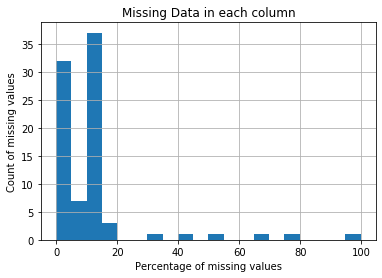

In [22]:
mean_missing.hist(bins=20)
plt.xlabel("Percentage of missing values")
plt.ylabel("Count of missing values")
plt.title("Missing Data in each column");

- We observe from the above histogram that there are outliers in the plot after 20. So, we will have to remove the outliers that is drop the columns in which missing values are more than 20%.

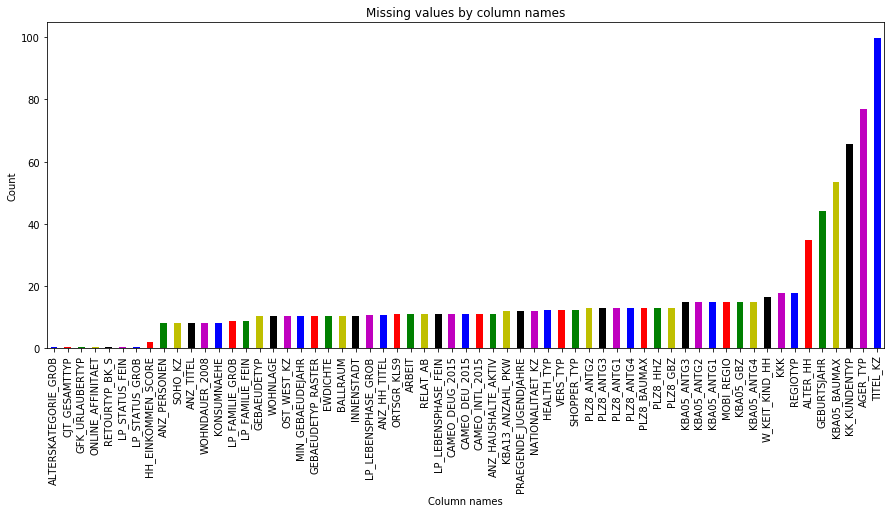

In [23]:
from itertools import cycle, islice
my_color = list(islice(cycle(['b', 'r', 'g','y','k','m']), None, len(azdias)))
mean_missing = mean_missing[mean_missing>0]
mean_missing.sort_values(inplace=True)
mean_missing.plot.bar(figsize=(15,6),color=my_color);
plt.xlabel("Column names")
plt.ylabel("Count")
plt.title("Missing values by column names");

- We observe from the above graph that there are 6 columns with more than 20% missing values.

> Remove the outlier columns from the dataset. 

In [24]:

mean_missing_per_column_20 = mean_missing[mean_missing>20]


In [25]:
drop_coloumns = mean_missing_per_column_20.index.tolist()
print('Columns have more than 20 percent missing data,that will be dropped:{}'.format(drop_coloumns))

Columns have more than 20 percent missing data,that will be dropped:['ALTER_HH', 'GEBURTSJAHR', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'AGER_TYP', 'TITEL_KZ']


In [26]:
azdias = azdias.drop(drop_coloumns, axis=1)

In [27]:
azdias.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [28]:
azdias.shape

(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column

- From the histogram for missing data we observed that the data columns having more than 20% missing values are separated from the centralised chunk of data below 20. Also, by using acountplot we saw that there were 6 columns with more than 20% missing values. These columns were considered as outliers and dropped form the table as they have huge amount of missing values and can change our analysis and predictions.

#### Step 1.1.3: Assess Missing Data in Each Row

Now, I'll perform a similar assessment for the rows of the dataset of how much data is missing in each row. Here, I will divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. We will select at least five of these columns and compare the distribution of values.
- I will use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.


In [29]:
# How much data is missing in each row of the dataset?
missing_row_values=azdias.isnull().sum(axis=1)
missing_row_values

0         43
1          0
2          0
3          7
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11        47
12         6
13         8
14        47
15         8
16         6
17        47
18         3
19         0
20        10
21         0
22         0
23         8
24        47
25         5
26        19
27         0
28         0
29         2
          ..
891191     0
891192     0
891193     0
891194     0
891195     0
891196     0
891197     0
891198     0
891199     0
891200     0
891201     0
891202     0
891203    14
891204     0
891205     0
891206     0
891207     0
891208     3
891209     0
891210     0
891211     0
891212     0
891213     0
891214     0
891215     0
891216     3
891217     4
891218     5
891219     0
891220     0
Length: 891221, dtype: int64

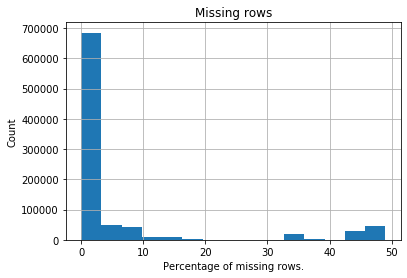

In [30]:
missing_row_values.hist(bins=15)
plt.xlabel("Percentage of missing rows.")
plt.ylabel("Count")
plt.title("Missing rows");

#### Divide the data into two subsets based on the number of missing values in each row.

In [31]:
missing_less_30=azdias[missing_row_values < 30]
missing_above_30=azdias[missing_row_values >= 30]

In [32]:
print('Rows with data missing above 30 :', missing_above_30.shape[0], 'or', \
      np.round(missing_above_30.shape[0]*100/azdias.shape[0],2), '% of all data')

Rows with data missing above 30 : 93160 or 10.45 % of all data


In [33]:
null_values_per_feature =(azdias.isnull().sum()/azdias.shape[0]).sort_values(ascending=False)*100

In [34]:
zero_missing_columns=[]
for i in range(null_values_per_feature.shape[0]):
    if(null_values_per_feature[i]==0):
        zero_missing_columns.append(null_values_per_feature.index[i])
zero_missing_columns

['SEMIO_FAM',
 'SEMIO_SOZ',
 'ANREDE_KZ',
 'SEMIO_TRADV',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'FINANZTYP',
 'SEMIO_PFLICHT',
 'GREEN_AVANTGARDE',
 'SEMIO_KAEM',
 'SEMIO_DOM',
 'SEMIO_KRIT',
 'SEMIO_RAT',
 'SEMIO_KULT',
 'SEMIO_ERL',
 'SEMIO_LUST',
 'SEMIO_VERT',
 'SEMIO_MAT',
 'SEMIO_REL',
 'ZABEOTYP']

- #### Compare the distribution of values for at least five columns where there are no or few missing values, between the two subsets.

In [35]:

def compare_plot(column_name):
    fig = plt.figure(10, figsize=(12,4))
    
    ax1 = fig.add_subplot(121)
    ax1.title.set_text('More Missing Rows')
    sns.countplot(missing_above_30[column_name],palette="rocket")
    
    ax2 = fig.add_subplot(122)
    ax2.title.set_text('Less Missing Rows')
    sns.countplot(missing_less_30[column_name],palette="deep")
                                                       
    #fig.suptitle(column)
    plt.show()

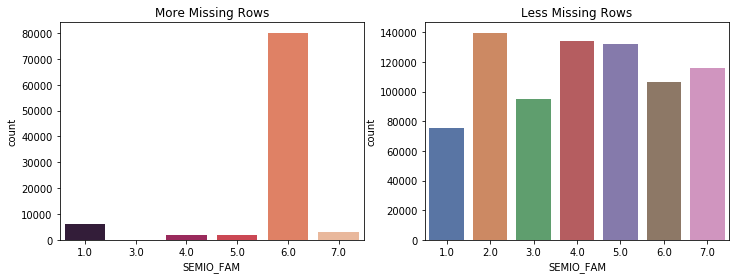

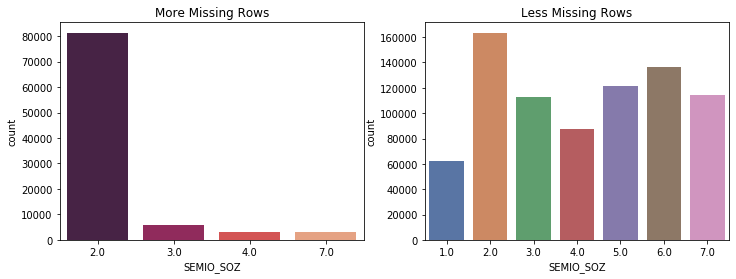

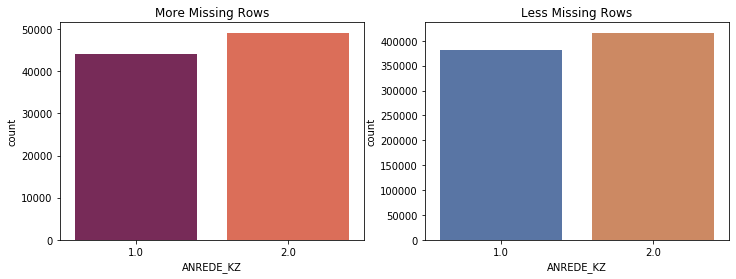

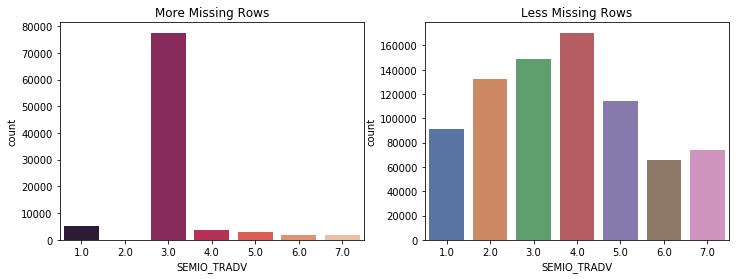

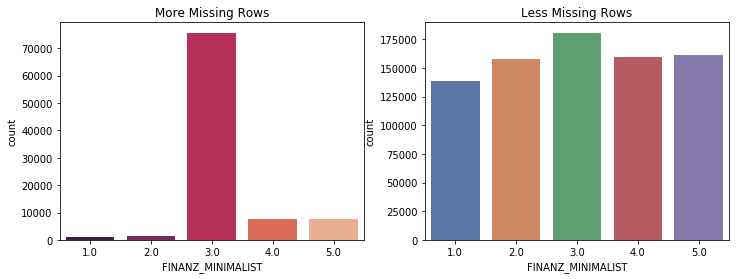

In [36]:
for i in range(5):
    compare_plot(zero_missing_columns[i])

#### Discussion 1.1.3: Assess Missing Data in Each Row

After dividing the missing rows data from the histogram in two segmeants, we have compared both data for specific column value. We observed from the above plots that nearly 10% of row data has missing more than 30 values which can be ignored to simplify further processing. But, we need to do something for the rows in the dataset having below 30% of missing data. By using imputer, we will replace the null values with using most frequent value in each category.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way to prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, I need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values, so we need to check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.


#### Features of each data type in the given Dataset.

In [37]:
feat_info=feat_info[feat_info.attribute.isin(missing_less_30.columns)]

In [38]:
feat_info.type.value_counts()


ordinal        49
categorical    18
numeric         6
mixed           6
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, I will ordinarily need to encode the levels as dummy variables. Depending on the number of categories, I will perform these :
- For binary (two-level) categoricals that take numeric values, I can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, I need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), I can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis.

#### Assess categorical variables: which are binary, which are multi-level, and which one needs to be re-encoded -

In [39]:
categ_variables = feat_info[feat_info["type"]=="categorical"]
categ_variables

,attribute,information_level,type,missing_or_unknown
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
10,FINANZTYP,person,categorical,[-1]
12,GFK_URLAUBERTYP,person,categorical,[]
13,GREEN_AVANTGARDE,person,categorical,[]
17,LP_FAMILIE_FEIN,person,categorical,[0]
18,LP_FAMILIE_GROB,person,categorical,[0]
19,LP_STATUS_FEIN,person,categorical,[0]
20,LP_STATUS_GROB,person,categorical,[0]
21,NATIONALITAET_KZ,person,categorical,"[-1,0]"


In [40]:
binary_categories=[]
multi_level=[]

for col in categ_variables.attribute:
    if missing_less_30[col].nunique()==2:
        binary_categories.append(col)
    else:
        multi_level.append(col)

In [41]:
binary_categories

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']

In [42]:
multi_level

['CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

**Re-encode categorical variable(s) to be kept in the analysis.**

In [43]:
missing_less_30["ANREDE_KZ"].replace({2:0,1:1},inplace=True)
missing_less_30["SOHO_KZ"].replace({0.0:0,1.0:1},inplace=True)
missing_less_30["OST_WEST_KZ"].replace({'W':0,'O':1},inplace=True)#non numerical variables
missing_less_30["OST_WEST_KZ"].astype('int',inplace=True)
missing_less_30=pd.get_dummies(data=missing_less_30,columns=multi_level)

C:\Users\somya\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [44]:
missing_less_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798061 entries, 1 to 891220
Columns: 194 entries, ALTERSKATEGORIE_GROB to CAMEO_DEU_2015_9E
dtypes: float64(63), int64(2), object(1), uint8(128)
memory usage: 525.4+ MB


In [45]:
azdias.shape

(891221, 79)

#### Discussion 1.2.1: Re-Encode Categorical Features

- Here, after categorizing the variables as binary and multilevel ,I used the get_dummies function of pandas to encode multi-level variables, and for the binary variables that is the numerical and non-numerical variables I re-encoded it directly using the replace function.

#### Step 1.2.2: Engineer Mixed-Type Features

> There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention - 
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

> I also checked `Data_Dictionary.md` for the details needed to finish this task.

#### Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.


In [46]:
missing_less_30.PRAEGENDE_JUGENDJAHRE.head()

1    14.0
2    15.0
3     8.0
4     8.0
5     3.0
Name: PRAEGENDE_JUGENDJAHRE, dtype: float64

In [47]:
decade_dic={1:1,2:1,3:2,4:2,5:3,6:3,7:3,8:4,9:4,10:5,11:5,12:5,13:5,14:6,15:6}
movement_dic={1:1,2:0,3:1,4:0,5:1,6:0,7:0,8:1,9:0,10:1,11:0,12:1,13:0,14:1,15:0}

missing_less_30["DECADE"]=missing_less_30.PRAEGENDE_JUGENDJAHRE
missing_less_30["MOVEMENT"]=missing_less_30.PRAEGENDE_JUGENDJAHRE

In [48]:
missing_less_30["DECADE"].replace(decade_dic,inplace=True)

In [49]:
missing_less_30["MOVEMENT"].replace(movement_dic,inplace=True)

In [50]:
missing_less_30.drop("PRAEGENDE_JUGENDJAHRE",axis=1,inplace=True)

In [51]:
type(missing_less_30["CAMEO_INTL_2015"][1])

str

#### Investigate "CAMEO_INTL_2015" and engineer two new variables that is Wealth and Life Stage.

In [52]:
wealth_dic={'11':1,'12':1,'13':1,'14':1,'15':1,
            '21':2,'22':2,'23':2,'24':2,'25':2,
            '31':3,'32':3,'33':3,'34':3,'35':3,
            '41':4,'42':4,'43':4,'44':4,'45':4,
            '51':5,'52':5,'53':5,'54':5,'55':5
            }
life_dic={'11':1,'12':2,'13':3,'14':4,'15':5,
            '21':1,'22':2,'23':3,'24':4,'25':5,
            '31':1,'32':2,'33':4,'34':4,'35':5,
            '41':1,'42':2,'43':3,'44':4,'45':5,
            '51':1,'52':2,'53':3,'54':4,'55':5
            }

#Create two features
missing_less_30["WEALTH"]=missing_less_30.CAMEO_INTL_2015
missing_less_30["LIFE_STAGE"]=missing_less_30.CAMEO_INTL_2015
#Replace them with new variables
missing_less_30["WEALTH"].replace(wealth_dic,inplace=True)
missing_less_30["LIFE_STAGE"].replace(life_dic,inplace=True)
#Drop the CAMEO_INTL_2015 column
missing_less_30.drop("CAMEO_INTL_2015",axis=1,inplace=True)

> #### Discussion 1.2.2: Engineer Mixed-Type Features

I investigated two mixed features that is PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015.
The steps which I used to engineer the mixed-type features as following:
- Created dictionary for each variable.
- Created two variables for each mixed-type features.
- Replaced the values the mixed-type in a new feature by the new values in dictionaries.
- Dropped the mixed-type columns.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, I need to make sure that my data frame now only has the columns that 
I want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.


- Now, I will look at the mixed variables to see if any change is required for better analysis.

In [53]:
mixed_variables=feat_info[feat_info.type=="mixed"]
mixed_variables

,attribute,information_level,type,missing_or_unknown
15,LP_LEBENSPHASE_FEIN,person,mixed,[0]
16,LP_LEBENSPHASE_GROB,person,mixed,[0]
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]"
56,WOHNLAGE,building,mixed,[-1]
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]"
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]"


In [54]:
for mixed_feature in mixed_variables["attribute"]:
    if mixed_feature in missing_less_30.columns:
        missing_less_30.drop(mixed_feature,axis=1,inplace=True)

In [55]:
missing_less_30.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
1,1.0,0.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,0,6.0,1.0,5.0,1.0
2,3.0,0.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,0,0,0,6.0,0.0,2.0,4.0
3,4.0,0.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,0,4.0,1.0,1.0,2.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,0,0,0,4.0,1.0,4.0,3.0
5,1.0,0.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,0,0,2.0,1.0,5.0,4.0


### Step 1.3: Create a Cleaning Function

Even though I've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that I'll need to perform the same cleaning steps on the customer demographics data.So, I will define a function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data, I can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [56]:
def clean_data(df,feat_info):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    missing_values=missing_splited(feat_info["missing_or_unknown"])
    
    # Identify missing or unknown data values and convert them to NaNs.
    for attribute,missing_values_list in zip(feat_info["attribute"],missing_values):
        if missing_values_list[0] != "": # if the list not empty 
            for missing_value in missing_values_list:
                #check if the missing value is number (negative or positive numbers)
                if missing_value.isnumeric() or missing_value.lstrip('-').isnumeric():
                    missing_value = int(missing_value)

                df.loc[df[attribute] == missing_value, attribute] = np.nan
    
    

    # remove selected columns and rows, ...
    #drop columns 
    columns=['ALTER_HH', 'GEBURTSJAHR', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'AGER_TYP','TITEL_KZ']
    df.drop(columns=columns,axis="columns",inplace=True)
    #rows
    num_null_rows=df.isnull().sum(axis=1)
    missing_less_30=df[num_null_rows<30]
    missing_above_30=df[num_null_rows>=30]
    missing_less_30 =missing_less_30.fillna(missing_less_30.mode().iloc[0])
     
    # select, re-encode, and engineer column values.
    feat_info=feat_info[feat_info.attribute.isin(missing_less_30.columns)]
    categ_variables=feat_info[feat_info.type=="categorical"]
    
    binary_categories=[]
    multi_level=[]

    for col in categ_variables.attribute:
        if missing_less_30[col].nunique()==2:
            binary_categories.append(col)
        else:
            multi_level.append(col)
            
    # Re-encode categorical variable(s) to be kept in the analysis.
    missing_less_30["ANREDE_KZ"].replace({2:0,1:1},inplace=True)
    missing_less_30["SOHO_KZ"].replace({0.0:0,1.0:1},inplace=True)
    missing_less_30["OST_WEST_KZ"].replace({'W':0,'O':1},inplace=True)#non numerical variables
    missing_less_30=pd.get_dummies(data=missing_less_30,columns=multi_level)
    
    #create dict I will use it to re-engineer the mixed variables
    decade_dic={1:1,2:1,3:2,4:2,5:3,6:3,7:3,8:4,9:4,10:5,11:5,12:5,13:5,14:6,15:6}
    movement_dic={1:1,2:0,3:1,4:0,5:1,6:0,7:0,8:1,9:0,10:1,11:0,12:1,13:0,14:1,15:0}
    
    #create new features
    missing_less_30["DECADE"]=missing_less_30.PRAEGENDE_JUGENDJAHRE
    missing_less_30["MOVEMENT"]=missing_less_30.PRAEGENDE_JUGENDJAHRE
    
    #replace with new variables
    missing_less_30["DECADE"].replace(decade_dic,inplace=True)
    missing_less_30["MOVEMENT"].replace(movement_dic,inplace=True)
    
    
    #Wealth and Life Stage dict
    wealth_dic={'11':1,'12':1,'13':1,'14':1,'15':1,
                '21':2,'22':2,'23':2,'24':2,'25':2,
                '31':3,'32':3,'33':3,'34':3,'35':3,
                '41':4,'42':4,'43':4,'44':4,'45':4,
                '51':5,'52':5,'53':5,'54':5,'55':5
                }
    life_dic={'11':1,'12':2,'13':3,'14':4,'15':5,
                '21':1,'22':2,'23':3,'24':4,'25':5,
                '31':1,'32':2,'33':4,'34':4,'35':5,
                '41':1,'42':2,'43':3,'44':4,'45':5,
                '51':1,'52':2,'53':3,'54':4,'55':5
                }
    
    #create two features
    missing_less_30["WEALTH"]=missing_less_30.CAMEO_INTL_2015
    missing_less_30["LIFE_STAGE"]=missing_less_30.CAMEO_INTL_2015
    #replace with new variables
    missing_less_30["WEALTH"].replace(wealth_dic,inplace=True)
    missing_less_30["LIFE_STAGE"].replace(life_dic,inplace=True)
    
    #drop mixed-type features which including PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015
    mixed_variables=feat_info[feat_info.type=="mixed"]
    for mixed_feature in mixed_variables["attribute"]:
        if mixed_feature in missing_less_30.columns:
            missing_less_30.drop(mixed_feature,axis=1,inplace=True)
    

    # Return the cleaned dataframe.
    return missing_less_30

In [57]:
azdias_test = pd.read_csv("Udacity_AZDIAS_Subset.csv",sep=';')
test_df=clean_data(azdias_test,feat_info)

In [58]:
test_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
1,1.0,0.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,0,6.0,1.0,5,1
2,3.0,0.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,0,0,0,6.0,0.0,2,4
3,4.0,0.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,0,4.0,1.0,1,2
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,0,0,0,4.0,1.0,4,3
5,1.0,0.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,0,0,2.0,1.0,5,4


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before I apply dimensionality reduction techniques to the data, I need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, I'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help me navigate to all of the classes and functions that I'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that I've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. 
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is taken, scaling each feature to mean 0 and standard deviation 1.
- For these classes, I can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. 

In [59]:
missing_less_30 =missing_less_30.fillna(missing_less_30.mode().iloc[0])

In [60]:

missing_less_30.isnull().sum(axis=1)

1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
12        0
13        0
15        0
16        0
18        0
19        0
20        0
21        0
22        0
23        0
25        0
26        0
27        0
28        0
29        0
31        0
32        0
33        0
34        0
36        0
         ..
891191    0
891192    0
891193    0
891194    0
891195    0
891196    0
891197    0
891198    0
891199    0
891200    0
891201    0
891202    0
891203    0
891204    0
891205    0
891206    0
891207    0
891208    0
891209    0
891210    0
891211    0
891212    0
891213    0
891214    0
891215    0
891216    0
891217    0
891218    0
891219    0
891220    0
Length: 798061, dtype: int64

In [61]:
missing_less_30.isnull().sum().sum()

0

In [89]:
from sklearn.preprocessing import StandardScaler,Imputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [63]:
imputer = Imputer()
missing_less_30 = pd.DataFrame(imputer.fit_transform(missing_less_30), columns = missing_less_30.columns)

C:\Users\somya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [64]:
scaler =StandardScaler()
features_scaled=scaler.fit_transform(missing_less_30)

In [65]:
features_scaled=pd.DataFrame(features_scaled,columns=missing_less_30.columns.tolist())

In [66]:
features_scaled.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,-1.766646,-0.957914,-1.494594,1.537924,-1.040692,1.465965,0.958645,1.339314,-0.530409,1.010164,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,1.098070,0.530409,1.175657,-1.252793
1,0.200522,-0.957914,-1.494594,0.864563,-1.766980,-0.570998,0.244119,1.339314,1.885336,1.010164,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,1.098070,-1.885336,-0.869680,0.756034
2,1.184106,-0.957914,0.683144,-0.482158,1.138172,-0.570998,-1.184933,-0.791205,-0.530409,-0.311816,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,-0.267778,0.530409,-1.551459,-0.583184
3,0.200522,1.043935,0.683144,0.191203,0.411884,-1.249985,0.244119,-0.791205,-0.530409,1.010164,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,-0.267778,0.530409,0.493878,0.086425
4,-1.766646,-0.957914,-0.042768,-1.155518,1.138172,-0.570998,-0.470407,1.339314,-0.530409,1.010164,...,-0.150064,-0.162542,-0.189539,-0.179782,-0.192768,-0.089764,-1.633627,0.530409,1.175657,0.756034


In [67]:
features_scaled.isnull().sum()

ALTERSKATEGORIE_GROB     0
ANREDE_KZ                0
FINANZ_MINIMALIST        0
FINANZ_SPARER            0
FINANZ_VORSORGER         0
FINANZ_ANLEGER           0
FINANZ_UNAUFFAELLIGER    0
FINANZ_HAUSBAUER         0
GREEN_AVANTGARDE         0
HEALTH_TYP               0
RETOURTYP_BK_S           0
SEMIO_SOZ                0
SEMIO_FAM                0
SEMIO_REL                0
SEMIO_MAT                0
SEMIO_VERT               0
SEMIO_LUST               0
SEMIO_ERL                0
SEMIO_KULT               0
SEMIO_RAT                0
SEMIO_KRIT               0
SEMIO_DOM                0
SEMIO_KAEM               0
SEMIO_PFLICHT            0
SEMIO_TRADV              0
SOHO_KZ                  0
VERS_TYP                 0
ANZ_PERSONEN             0
ANZ_TITEL                0
HH_EINKOMMEN_SCORE       0
                        ..
CAMEO_DEU_2015_5A        0
CAMEO_DEU_2015_5B        0
CAMEO_DEU_2015_5C        0
CAMEO_DEU_2015_5D        0
CAMEO_DEU_2015_5E        0
CAMEO_DEU_2015_5F        0
C

> ### Discussion 2.1: Apply Feature Scaling
- I removed the null values and used the Standard Scaler for scaling the features for further analysis.

### Step 2.2: Perform Dimensionality Reduction

On the scaled data, I will apply dimensionality reduction techniques.

- I will use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. 
- I will check out the ratio of variance explained by each principal component as well as the cumulative variance explained. I will try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on my findings,I will select a value for the number of transformed features I'll retain for the clustering part of the project.
- After making a choice for the number of components to keep, I will re-fit a PCA instance to perform the decided-on transformation.

In [90]:
from sklearn.decomposition import PCA

#### Applying PCA to the data.

In [71]:
pca = PCA()
pca.fit(features_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### Investigate the variance accounted for by each principal component -

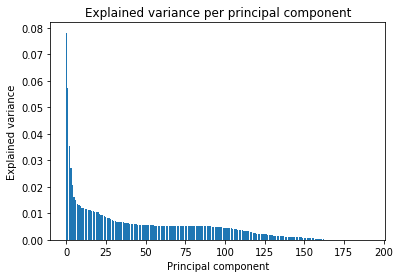

In [68]:
num_components=np.arange(len(pca.explained_variance_ratio_))
values=pca.explained_variance_ratio_
plt.bar(num_components,values)
plt.xlabel("Principal component")
plt.ylabel("Explained variance")
plt.title("Explained variance per principal component")
plt.show()

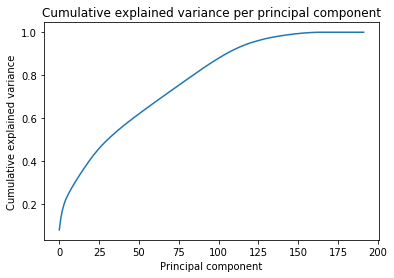

In [69]:
cum_vals = np.cumsum(values)
plt.plot(num_components,cum_vals)
plt.xlabel("Principal component")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance per principal component")
plt.show()

#### Re-applying PCA to the data while selecting for number of components to retain.

In [72]:
pca_80 = PCA(n_components=80)
data_PCA = pca_80.fit_transform(features_scaled)

> ### Discussion 2.2: Perform Dimensionality Reduction
- From the above plots, we can see that we will get cumulative frequency on around 80% of the data approximately so I retained on 80 components of the data.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

Each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.
- To investigate the features, I will map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list.I will also use the data dictionary document to understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- I will investigate and interpret feature associations from the first three principal components in this substep.

In [73]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def comp_analysis(missing_less_30):
    feature_map = pd.Series(missing_less_30.columns, range(len(missing_less_30.columns)))
    components = {}
    for ix in range(pca.components_.shape[0]):
        components[ix] = [(feature_map[a],b) for a,b in sorted(enumerate(pca.components_[ix]),key=lambda x:x[1],reverse=True)]
    return pd.DataFrame(components)

In [74]:
# Top 10 positive components
components = comp_analysis(missing_less_30)
components[:10]

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,"(LP_STATUS_GROB_1.0, 0.1973673075059069)","(ALTERSKATEGORIE_GROB, 0.23121781361213828)","(ANREDE_KZ, 0.34474606098733857)","(GREEN_AVANTGARDE, 0.2932793730562743)","(ANZ_PERSONEN, 0.29074443437982195)","(LP_STATUS_GROB_4.0, 0.20823504772703644)","(LP_STATUS_GROB_3.0, 0.3500776214496563)","(LP_FAMILIE_GROB_4.0, 0.24236495138748104)","(OST_WEST_KZ, 0.3327028110482645)","(LP_FAMILIE_GROB_2.0, 0.46112898384815293)",...,"(CAMEO_DEUG_2015_4, 0.26313303863438575)","(LP_FAMILIE_FEIN_2.0, 0.2743954580779115)","(LP_STATUS_FEIN_10.0, 0.26443015054723235)","(LP_STATUS_FEIN_1.0, 0.24664299881759394)","(LP_STATUS_FEIN_10.0, 0.2755624722075242)","(CAMEO_DEUG_2015_9, 0.4572298037425386)","(CAMEO_DEUG_2015_4, 0.46469316371120034)","(LP_FAMILIE_FEIN_2.0, 0.32823771122186307)","(FINANZTYP_6.0, 0.3572827204479955)","(LP_FAMILIE_FEIN_1.0, 0.5829134424022181)"
1,"(HH_EINKOMMEN_SCORE, 0.1863388894450238)","(FINANZ_VORSORGER, 0.21718092615836287)","(SEMIO_VERT, 0.3187741340406576)","(LP_STATUS_FEIN_10.0, 0.24336553838892927)","(LP_FAMILIE_GROB_5.0, 0.257512333793972)","(MIN_GEBAEUDEJAHR, 0.1807140518670873)","(GEBAEUDETYP_3.0, 0.3374043959889655)","(LP_STATUS_FEIN_3.0, 0.20171770376393333)","(LIFE_STAGE, 0.24982460275280446)","(LP_FAMILIE_FEIN_2.0, 0.4611289838481526)",...,"(CAMEO_DEU_2015_8C, 0.20733434950511714)","(LP_STATUS_GROB_4.0, 0.2552540997494299)","(LP_FAMILIE_FEIN_4.0, 0.18187228155965965)","(LP_STATUS_FEIN_2.0, 0.19485891872914166)","(WEALTH, 0.24273084026855754)","(LP_STATUS_FEIN_10.0, 0.27118818611520074)","(CJT_GESAMTTYP_4.0, 0.2087815941353652)","(LP_STATUS_FEIN_9.0, 0.27860143810669574)","(FINANZTYP_1.0, 0.3206102323381896)","(LP_STATUS_GROB_4.0, 0.22121196228635076)"
2,"(WEALTH, 0.18484731371002602)","(ZABEOTYP_3.0, 0.2002793366898839)","(SEMIO_FAM, 0.2606048099368584)","(LP_STATUS_GROB_5.0, 0.2433655383889292)","(LP_FAMILIE_FEIN_10.0, 0.19539870285155167)","(FINANZTYP_3.0, 0.17642455253444622)","(LP_STATUS_FEIN_6.0, 0.30790778984751394)","(LP_STATUS_GROB_2.0, 0.1857819565835654)","(ARBEIT, 0.1956293061423565)","(KBA05_ANTG4, 0.1367447581010073)",...,"(CAMEO_DEU_2015_8D, 0.19425141723435327)","(FINANZTYP_6.0, 0.22497524663558785)","(LP_FAMILIE_FEIN_5.0, 0.1786921098835233)","(CJT_GESAMTTYP_4.0, 0.15626175907619635)","(LP_FAMILIE_GROB_5.0, 0.21163443036888627)","(LP_STATUS_GROB_2.0, 0.20162044494229517)","(CJT_GESAMTTYP_3.0, 0.18739856663871493)","(LP_FAMILIE_FEIN_1.0, 0.23102812072104603)","(FINANZTYP_5.0, 0.2526145457798182)","(CJT_GESAMTTYP_4.0, 0.12032019298461676)"
3,"(PLZ8_ANTG3, 0.1813294979846071)","(SEMIO_ERL, 0.17963261527161395)","(SEMIO_SOZ, 0.2571082047272055)","(EWDICHTE, 0.20996616028424542)","(KKK, 0.18293396101046405)","(LP_STATUS_FEIN_9.0, 0.16708819600697364)","(LP_STATUS_FEIN_7.0, 0.1603746928749061)","(LP_FAMILIE_FEIN_7.0, 0.17660698827595886)","(FINANZTYP_6.0, 0.17086655502209128)","(KBA13_ANZAHL_PKW, 0.13298331173262018)",...,"(CAMEO_DEUG_2015_6, 0.19094640461104107)","(FINANZTYP_1.0, 0.20188316413325189)","(CAMEO_DEU_2015_6B, 0.13263389483905855)","(LP_STATUS_FEIN_9.0, 0.15532127781106167)","(LP_STATUS_FEIN_9.0, 0.18349928847548994)","(LP_FAMILIE_GROB_2.0, 0.16804375588879292)","(CJT_GESAMTTYP_2.0, 0.18440927856228012)","(CAMEO_DEUG_2015_9, 0.1934431707735322)","(FINANZTYP_2.0, 0.25103825203248364)","(LP_FAMILIE_GROB_5.0, 0.10915019991713659)"
4,"(PLZ8_ANTG4, 0.17498511145776402)","(SEMIO_LUST, 0.1619275062117633)","(SEMIO_KULT, 0.2516713639333599)","(ORTSGR_KLS9, 0.20543724664267157)","(REGIOTYP, 0.14680886253818934)","(LP_FAMILIE_FEIN_1.0, 0.14632704079277184)","(ANZ_HH_TITEL, 0.1543123229074052)","(LP_FAMILIE_GROB_2.0, 0.15914513856253387)","(CAMEO_DEU_2015_3D, 0.15301031538450016)","(W_KEIT_KIND_HH, 0.13241732729224043)",...,"(CAMEO_DEU_2015_3D, 0.18755978955677)","(LIFE_STAGE, 0.1973292307610201)","(LP_STATUS_GROB_2.0, 0.1237870695823036)","(CAMEO_DEUG_2015_7, 0.15401871253537686)","(CAMEO_DEUG_2015_5, 0.1808366318862267)","(LP_FAMILIE_GR

- #### Map weights for the second principal component to corresponding feature names and then print the linked values, sorted by weight.

In [75]:
# Top 10 negative components
components[-10:]

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
182,"(LP_STATUS_FEIN_10.0, -0.11627364844298407)","(ONLINE_AFFINITAET, -0.16369032543570533)","(MOVEMENT, -0.07423200947206622)","(LP_STATUS_FEIN_4.0, -0.13143078151659535)","(PLZ8_HHZ, -0.08697960064403398)","(CAMEO_DEUG_2015_6, -0.1256936773630701)","(KKK, -0.09946535676980699)","(CAMEO_DEU_2015_9B, -0.10526524190014339)","(PLZ8_ANTG2, -0.09196459058140685)","(CAMEO_DEUG_2015_7, -0.09612899531696231)",...,"(LP_FAMILIE_FEIN_4.0, -0.08322118102458638)","(CAMEO_DEU_2015_9A, -0.1018548508439489)","(CAMEO_DEU_2015_3D, -0.12798523417624996)","(CAMEO_DEU_2015_7B, -0.10106735068828625)","(LP_STATUS_FEIN_1.0, -0.10556608685879107)","(LP_FAMILIE_FEIN_8.0, -0.10320287235670797)","(LP_STATUS_FEIN_2.0, -0.11193411281976101)","(CAMEO_DEU_2015_9B, -0.10339593603817201)","(ZABEOTYP_4.0, -0.11164701559984205)","(LP_STATUS_FEIN_10.0, -0.05133133967207682)"
183,"(LP_STATUS_GROB_5.0, -0.11627364844298407)","(SEMIO_KULT, -0.16448816817204429)","(LP_STATUS_FEIN_2.0, -0.0788013151410035)","(LP_FAMILIE_FEIN_1.0, -0.14639470433660157)","(FINANZ_UNAUFFAELLIGER, -0.09474224926655495)","(KBA05_ANTG2, -0.12909680313410318)","(RELAT_AB, -0.11005667840279457)","(CAMEO_DEU_2015_9D, -0.1057101165636396)","(FINANZ_VORSORGER, -0.096565141235285)","(LP_STATUS_GROB_2.0, -0.09628429982490266)",...,"(CAMEO_DEU_2015_4A, -0.10781217525595858)","(LP_FAMILIE_FEIN_10.0, -0.12154181490707061)","(LP_STATUS_FEIN_4.0, -0.12814745056886612)","(CAMEO_DEU_2015_7A, -0.11898119038268495)","(LP_STATUS_FEIN_3.0, -0.10829709268502033)","(LP_FAMILIE_GROB_1.0, -0.12020355921344306)","(CAMEO_DEU_2015_4E, -0.11389220928388255)","(CAMEO_DEU_2015_9D, -0.105032340451029)","(CJT_GESAMTTYP_4.0, -0.11380626506431253)","(CAMEO_DEUG_2015_4, -0.058258698292919485)"
184,"(INNENSTADT, -0.12735242926369525)","(SEMIO_RAT, -0.16674881492827293)","(SHOPPER_TYP_2.0, -0.09266442932309958)","(LP_FAMILIE_GROB_1.0, -0.14639470433660157)","(KBA13_ANZAHL_PKW, -0.09626632135794802)","(LP_STATUS_GROB_3.0, -0.14017352577780592)","(CAMEO_DEUG_2015_6, -0.11492041810800092)","(CAMEO_DEU_2015_9C, -0.10605913994246985)","(CAMEO_DEU_2015_7B, -0.12745392537366348)","(LP_STATUS_FEIN_3.0, -0.10402738511218121)",...,"(LP_STATUS_FEIN_3.0, -0.113294471708724)","(LP_STATUS_GROB_2.0, -0.12209057472152672)","(CAMEO_DEU_2015_4C, -0.15059775797356836)","(LP_STATUS_GROB_3.0, -0.13957660227291055)","(GEBAEUDETYP_1.0, -0.11142549356749248)","(CAMEO_DEU_2015_9E, -0.12026367929500112)","(CAMEO_DEU_2015_4B, -0.1317668404109231)","(FINANZTYP_1.0, -0.10527796116752605)","(GEBAEUDETYP_8.0, -0.11751115528127509)","(GEBAEUDETYP_1.0, -0.05972478714416221)"
185,"(PLZ8_GBZ, -0.13262088909975805)","(FINANZ_ANLEGER, -0.2029367176719162)","(FINANZTYP_1.0, -0.09990613844008767)","(HH_EINKOMMEN_SCORE, -0.15333602989328243)","(LP_STATUS_FEIN_3.0, -0.11473602008713396)","(LP_STATUS_FEIN_3.0, -0.15535026698140594)","(KBA05_ANTG3, -0.11835166409673513)","(KBA05_ANTG1, -0.10709687121471907)","(CAMEO_DEU_2015_7A, -0.13001162200478822)","(RELAT_AB, -0.10416695980014401)",...,"(LP_STATUS_FEIN_4.0, -0.11696833864706833)","(LP_STATUS_FEIN_1.0, -0.12449119833200781)","(CAMEO_DEU_2015_2D, -0.1509884602272502)","(LP_STATUS_GROB_5.0, -0.1462514755563899)","(LP_STATUS_FEIN_4.0, -0.11180890665381812)","(LP_FAMILIE_FEIN_10.0, -0.1284651479922166)","(CAMEO_DEU_2015_4D, -0.1362641508566925)","(CAMEO_DEUG_2015_4, -0.10756554265274235)","(LP_FAMILIE_GROB_5.0, -0.11800957354073383)","(LP_FAMILIE_FEIN_11.0, -0.06157768251804044)"
186,"(KONSUMNAEHE, -0.1364053588698828)","(SEMIO_PFLICHT, -0.20409505121172486)","(FINANZ_ANLEGER, -0.15335829824404945)","(KKK, -0.16121894725676417)","(PLZ8_GBZ, -0.12340167233119904)","(ANZ_PERSONEN, -0.15874608505822085)","(KBA05_ANTG2, -0.12825839486127208)","(W_KEIT_KIND_HH, -0.10851553589325072)","(CAMEO_DEUG_2015_4, -0.1386675266496002)","(LP_FAMILIE_FEIN_10.0, -0.11408476380052207)",...,"(LP_FAMILIE_GROB_2.0, -0.1193797032076389)","(LP_STATUS_FEIN_8.0, -0.129284457276

- #### Map weights for the third principal component to corresponding feature names and then print the linked values, sorted by weight.

In [76]:
def comp(components,compnum):
    print('Top positive components {}\n\n'.format(compnum), components.loc[:8,compnum])
    print('Top negative components {}\n\n'.format(compnum), components.loc[components.shape[0]-8:,compnum].head(8))

# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
components.loc[:,:].head(8)
# 3rd Component
for num in range(3):
    comp(components,num)

Top positive components 0

 0    (LP_STATUS_GROB_1.0, 0.1973673075059069)
1    (HH_EINKOMMEN_SCORE, 0.1863388894450238)
2               (WEALTH, 0.18484731371002602)
3            (PLZ8_ANTG3, 0.1813294979846071)
4           (PLZ8_ANTG4, 0.17498511145776402)
5          (ORTSGR_KLS9, 0.15452880464725974)
6              (EWDICHTE, 0.1529579480265696)
7     (FINANZ_HAUSBAUER, 0.14842522912250003)
8           (KBA05_ANTG4, 0.1294599022125955)
Name: 0, dtype: object
Top negative components 0

 184          (INNENSTADT, -0.12735242926369525)
185            (PLZ8_GBZ, -0.13262088909975805)
186          (KONSUMNAEHE, -0.1364053588698828)
187          (KBA05_ANTG1, -0.1807475334654445)
188           (KBA05_GBZ, -0.18129306825471286)
189          (PLZ8_ANTG1, -0.18257358427009843)
190          (MOBI_REGIO, -0.18809672082575388)
191    (FINANZ_MINIMALIST, -0.1952495510380451)
Name: 0, dtype: object
Top positive components 1

 0    (ALTERSKATEGORIE_GROB, 0.23121781361213828)
1        (FINANZ_VORSOR

> ### Discussion 2.3: Interpret Principal Components
From the above principal components, I have observed the following :
Here are the interpretation of the first three components as requested above:

>Component 0: Banlieue/Urban people with lower financial interest and income
- Low financial interest
- High movement
- Low income earner
- With low/no 1-2 houses nearby
- Low income
- Low number of buildings nearby
- With low share of 1-2 houses in the region
- Low or no 6-8 family houses in the region

>Component 1: Old-age people with traditional social and economic features
- Early generation
- Older (In line with Early Generation)
- Religious
- Money-saver
- Likely inconspicuous
- Dutiful
- Be prepared (finance)
- Traditional minded

>Component 2: Male Aggressive
- Male
- Non-dreamful
- With combative attitude
- Dominant minded
- Critical minded
- Non-family oriented
- Non-socially minded
- Non-culturally minded


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

I've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, I will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Used sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, computed the average difference from each point to its assigned cluster's center.
- Performed the above two steps for a number of different cluster counts. 
- Once I've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. 

In [88]:
from sklearn.cluster import KMeans

In [77]:
# Over a number of different cluster counts...
# run k-means clustering on the data and...
num_clusters=np.arange(10,21)
scores=[]
for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(data_PCA)
    # compute the average within-cluster distances.
    score = np.abs(model.score(data_PCA))
    scores.append(score)

In [78]:
num_clusters

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

- #### Investigate the change in within-cluster distance across number of clusters.

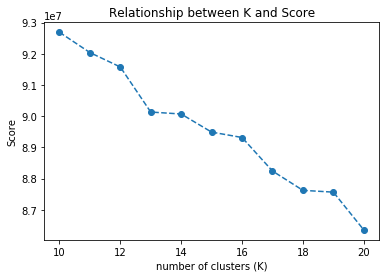

In [79]:
plt.plot(num_clusters,scores,marker='o',linestyle='--')
plt.xlabel('number of clusters (K)')
plt.ylabel('Score')
plt.title("Relationship between K and Score")
plt.show()

- #### Re-fit the k-means model with the selected number of clusters and obtain cluster predictions for the general population demographics data.

In [92]:
kmeans = KMeans(n_clusters=18)
model=kmeans.fit(data_PCA)
data_pred=model.predict(data_PCA)

> ### Discussion 3.1: Apply Clustering to General Population
- I  used the elbow method to find the number of clusters but as we saw from the above plot that we are unable to recognize the elbow but, we see that the score decreases with the number of clusters increase between 18-20 clusters so I decided to choose 18 clusters for further analysis.

### Step 3.2: Apply All Steps to the Customer Data

Now that I have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. 

- I will apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier.
- I will use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, I should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor I will be creating new sklearn objects! 

In [77]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [78]:
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


- Apply preprocessing, feature transformation, and clustering from the general demographics onto the customer data, obtaining cluster predictions for the customer demographics data.

In [79]:
customers_clean= clean_data(customers,feat_info)

In [80]:
customers_clean.head()


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,2.0,1,1.0,...,0,0,0,0,0,0,2.0,0.0,1,3
2,4.0,0.0,5.0,1.0,5.0,1.0,4.0,4.0,1,2.0,...,0,0,0,0,0,0,2.0,0.0,3,4
3,4.0,1.0,5.0,1.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,0,1.0,1.0,2,4
4,3.0,1.0,3.0,1.0,4.0,4.0,5.0,2.0,0,3.0,...,0,0,0,0,0,0,4.0,1.0,4,1
5,3.0,1.0,5.0,1.0,5.0,1.0,2.0,3.0,1,3.0,...,0,0,0,0,0,0,2.0,0.0,3,4


In [81]:
list(set(test_df)-set(customers_clean.columns))

['GEBAEUDETYP_5.0']

In [82]:
customers_clean["GEBAEUDETYP_5.0"]=0

In [83]:
test_df.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,CAMEO_DEU_2015_8D,CAMEO_DEU_2015_9A,CAMEO_DEU_2015_9B,CAMEO_DEU_2015_9C,CAMEO_DEU_2015_9D,CAMEO_DEU_2015_9E,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
1,1.0,0.0,1.0,5.0,2.0,5.0,4.0,5.0,0,3.0,...,0,0,0,0,0,0,6.0,1.0,5,1
2,3.0,0.0,1.0,4.0,1.0,2.0,3.0,5.0,1,3.0,...,0,0,0,0,0,0,6.0,0.0,2,4
3,4.0,0.0,4.0,2.0,5.0,2.0,1.0,2.0,0,2.0,...,0,0,0,0,0,0,4.0,1.0,1,2
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0,3.0,...,0,0,0,0,0,0,4.0,1.0,4,3
5,1.0,0.0,3.0,1.0,5.0,2.0,2.0,5.0,0,3.0,...,0,0,0,0,0,0,2.0,1.0,5,4


In [84]:
set(test_df)-set(customers_clean.columns)

set()

In [85]:

customers_clean.isnull().sum().sum()

0

In [93]:
customers_scaled=scaler.transform(customers_clean)
customers_scaled=pd.DataFrame(customers_scaled,columns=customers_clean.columns.tolist())
customers_pca=pca_80.transform(customers_scaled)

C:\Users\somya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [94]:

#customers_scaled
pred_customers= model.predict(customers_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, I have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, I will compare the two cluster distributions to see where the strongest customer base for the company is.

I will consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

I will take a look at the following points in this step:

- Computed the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population?
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

- #### Compare the proportion of data in each cluster for the customer data to the proportion of data in each cluster for the general population.

- #### Proportion of data in each cluster for the general population.

In [101]:
def compare_plot(general,customers):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(15)
    ax1.set_title('General Clusters')
    sns.countplot(general,ax=ax1)

    ax2.set_title('Customers Clusters')
    sns.countplot(customers,ax=ax2)
    plt.show()

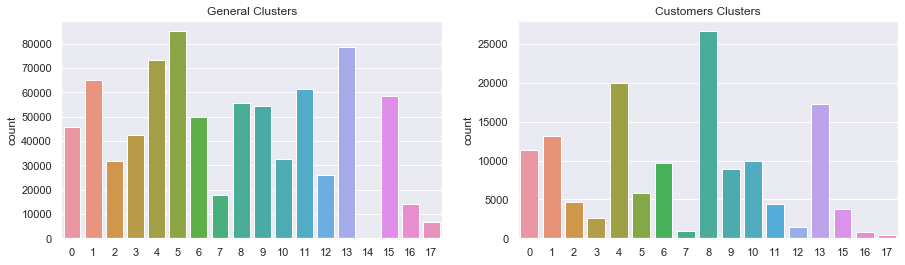

In [102]:
compare_plot(data_pred,pred_customers)

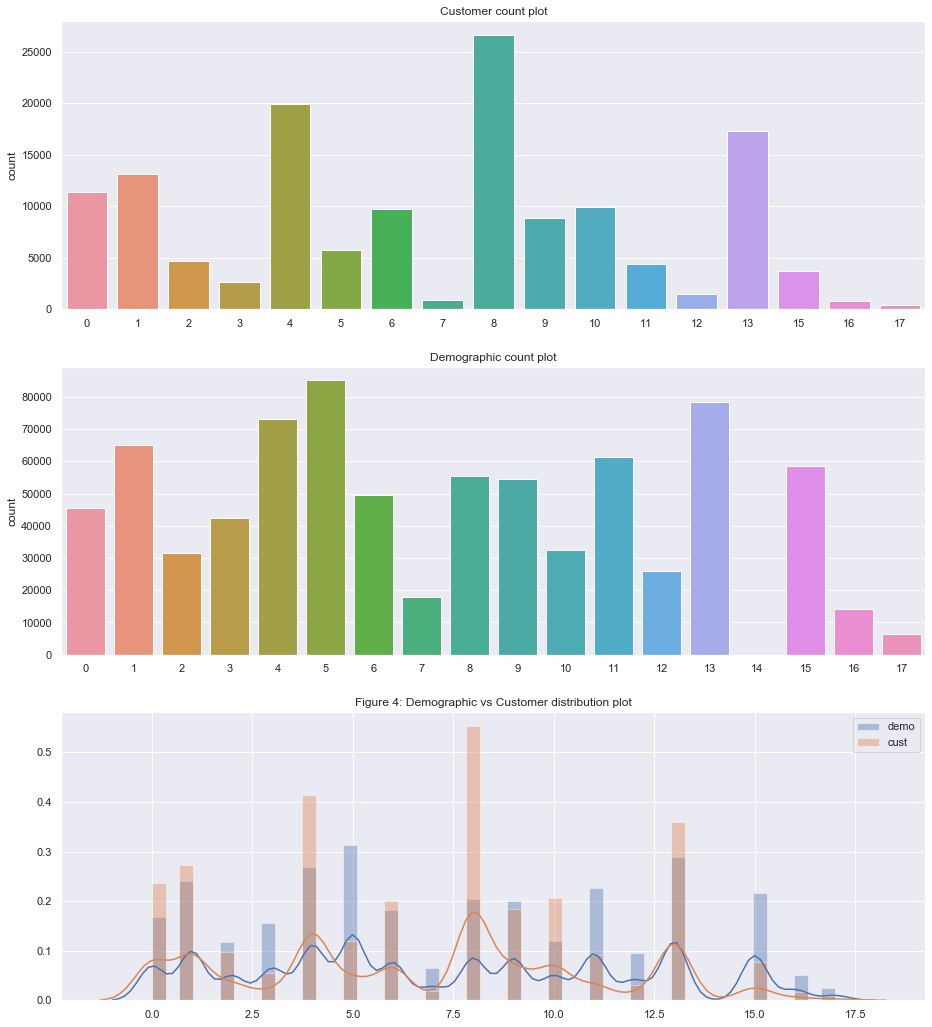

In [103]:
fig = plt.figure()
ax=fig.add_axes([0,0,2,1], title='Figure 4: Demographic vs Customer distribution plot')
ax2=fig.add_axes([0,1.2,2,1], title='Demographic count plot')
ax3=fig.add_axes([0,2.4,2,1], title='Customer count plot')
sns.set(style="darkgrid")
sns.distplot(data_pred, label='demo',ax=ax)
sns.distplot(pred_customers, label='cust', ax=ax)
sns.countplot(data_pred, label='demo', ax=ax2)
sns.countplot(pred_customers, label='cust', ax=ax3)
ax.legend();

In [104]:
positive_corr=["LP_STATUS_GROB_1.0","HH_EINKOMMEN_SCORE","WEALTH","PLZ8_ANTG3","ALTERSKATEGORIE_GROB","FINANZ_VORSORGER","ZABEOTYP_3.0","SEMIO_ERL",
"ANREDE_KZ","SEMIO_VERT","SEMIO_FAM","SEMIO_SOZ"]
negative_corr=["FINANZ_MINIMALIST","MOBI_REGIO","PLZ8_ANTG1","KBA05_GBZ","DECADE","FINANZ_SPARER","FINANZ_UNAUFFAELLIGER","SEMIO_REL",
             "SEMIO_KAEM","SEMIO_DOM","SEMIO_KRIT","SEMIO_ERL"]


#### What kinds of people are part of a cluster that is overrepresented in the customer data compared to the general population?

In [105]:
centroid_10 = scaler.inverse_transform(pca_80.inverse_transform(model.cluster_centers_[10]))

#### What kinds of people are part of a cluster that is underrepresented in the customer data compared to the general population?

In [106]:
centroid_16 = scaler.inverse_transform(pca_80.inverse_transform(model.cluster_centers_[16]))

In [107]:
centroids=pd.DataFrame({"feature":customers_clean.columns,"centroid_10":centroid_10,"centroid_16":centroid_16})

In [108]:
centroids[centroids["feature"].isin(positive_corr)]

,feature,centroid_10,centroid_16
0,ALTERSKATEGORIE_GROB,3.624440,3.514960
1,ANREDE_KZ,0.762727,0.694894
4,FINANZ_VORSORGER,4.702399,4.640397
11,SEMIO_SOZ,4.428333,4.528857
12,SEMIO_FAM,3.878321,3.983828
15,SEMIO_VERT,5.673876,5.320255
17,SEMIO_ERL,4.880219,4.725615
29,HH_EINKOMMEN_SCORE,1.996522,2.730006
53,PLZ8_ANTG3,0.968608,1.998453
110,LP_STATUS_GROB_1.0,-0.134730,0.036991


In [109]:
centroids[centroids["feature"].isin(negative_corr)]

,feature,centroid_10,centroid_16
2,FINANZ_MINIMALIST,4.863690,4.128009
3,FINANZ_SPARER,1.171840,1.361171
6,FINANZ_UNAUFFAELLIGER,1.714265,1.952346
13,SEMIO_REL,2.993605,3.017836
17,SEMIO_ERL,4.880219,4.725615
20,SEMIO_KRIT,3.547043,4.212982
21,SEMIO_DOM,3.808679,4.340796
22,SEMIO_KAEM,3.184095,3.632024
41,KBA05_GBZ,4.326085,3.363448
47,MOBI_REGIO,4.357466,3.285491


### Discussion 3.3: Compare Customer Data to Demographics Data


Cluster 10 is overrepresnted in the customer data compared to the general population Cluster 10 in the following features has high values as compared to cluster 16:

- SEMIO_VERT(Personality typology:dreamful) 
- SEMIO_SOZ (Personality typology:socially-minded) 
- FINANZ_VORSORGER(Financial typology:be prepared) 
- SEMIO_FAM (Personality typology:family-minded) 
- ANREDE_KZ(Gender:male)

So, we can decide the customer segment that relatively popular with the mail-order company.
The customer is a male, who has personality dreamful,socially-minded,family-minded, and has money and financially prepared.

Cluster 16 is underrepresented in the customer data compared to the general population Cluster 16 in the following features has high values compared to cluster 10.

- ANREDE_KZ(Gender:femal)
- SEMIO_ERL(Personality typology:event-oriented) 
- FINANZ_UNAUFFAELLIGER(Financial typology:inconspicuous) FINANZ_UNAUFFAELLIGER=2.462602
- SEMIO_REL(Personality typology:religious) SEMIO_REL=4.048350
- SEMIO_DOM (Personality typology:dominant-minded) SEMIO_DOM=5.049048
- FINANZ_SPARER(Financial typology:money-saver) FINANZ_SPARER =2.344102
- SEMIO_KRIT (Personality typology:critical-minded) SEMIO_KRIT=4.682429

So,we can decide the customer segments that are comparatively unpopular with the mail-order company.
.